In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

a=1
b=1
c=1

r = 6371


#Geodesic Flow on a Sphere
def exact_dynamics_sphere(x,v,t,trajectory=True):
    alpha = np.linalg.norm(v) #angular velocity
    xnew = x*np.cos(alpha*t) + v*np.sin(alpha*t)/alpha
    vnew = -alpha*x*np.sin(alpha*t) + v*np.cos(alpha*t)
    
    if trajectory:
        traj = []
        h = 0.1
        number_of_intervals = np.floor(t/h)
        for i in range(int(number_of_intervals)):
            x_n = x*np.cos(alpha*h*i) + v*np.sin(alpha*h*i)/alpha
            v_n = -alpha*x*np.sin(alpha*h*i) + v*np.cos(alpha*h*i)
            traj.append(x_n)
        return [xnew,vnew,traj]
    return [xnew,vnew]


In [2]:
#Initialise
x1 = np.array([1,0,0])
v1 = np.array([0,0,1])

x2 = np.array([0,1,0])
v2 = np.array([0,0,1])

t = np.pi/2+ 0.5

In [3]:
[x1,v1,traj1] = exact_dynamics_sphere(x1,v1,t,trajectory=True)
[x2,v2,traj2] = exact_dynamics_sphere(x2,v2,t,trajectory=True)

#dynamic_positions1 = []
#for i in range(len(traj1)):
    #for j in range(len(traj1[i])):
        #dynamic_positions1.append(traj1[i][j])
        
#dynamic_positions2 = []
#for i in range(len(traj2)):
    #for j in range(len(traj2[i])):
        #dynamic_positions2.append(traj2[i][j])

for i in range(len(traj1)):
    traj1[i] = r*traj1[i]
    traj2[i] = r*traj2[i]


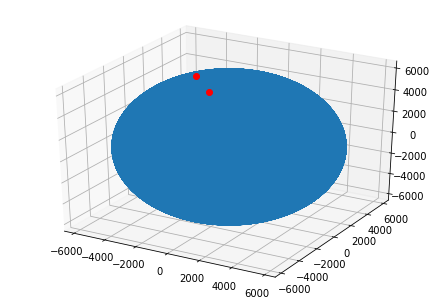

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = Axes3D(fig)
#ax.axis('off')

# prepare the axes limits
ax.set_xlim((-(r+0.1), (r+0.1)))
ax.set_ylim((-(r+0.1), (r+0.1)))
ax.set_zlim((-(r+0.1), (r+0.1)))

#background sphere
m=1000
theta1 = 2*np.pi*np.linspace(0,1,num=m)
phi1 = np.arccos(1 - 2 * np.linspace(0,1,num=m))
phi1 , theta1 = np.meshgrid(phi1, theta1)
    
X = r*np.sin(phi1) * np.cos(theta1)
Y = r*np.sin(phi1) * np.sin(theta1)
Z = r*np.cos(phi1)

X = np.reshape(X,(m**2))
Y = np.reshape(Y,(m**2))
Z = np.reshape(Z,(m**2))

ax.plot(X,Y,Z,'-')
    
data_sphere= np.array([X,Y,Z])

point1, = ax.plot([0],[0],[1],'ro')
point2, = ax.plot([0],[0],[1],'ro')

def animate(i):
    x_1 = traj1[i][0]
    y_1 = traj1[i][1]
    z_1 = traj1[i][2]
    
    x_2 = traj2[i][0]
    y_2 = traj2[i][1]
    z_2 = traj2[i][2]
    
    point1.set_data(np.array([x_1,y_1]))
    point1.set_3d_properties(z_1,'z')
    
    point2.set_data(np.array([x_2,y_2]))
    point2.set_3d_properties(z_2,'z')
    
    return point1,

anim = FuncAnimation(fig, animate, frames=len(traj1), interval=200,blit = True)


anim.save('satellite.gif', writer='imagemagick')